In [2]:
#Some Basic Imports
import matplotlib.pyplot as plt #For Visualization
import numpy as np              #For handling arrays
import pandas as pd             # For handling data


In [3]:
#Define Directories for train, test & Validation Set
train_path = "C:\\Users\\kates\\Documents\\Classification\\Input\\train"
test_path = "C:\\Users\\kates\\Documents\\Classification\\Input\\test"
valid_path = "C:\\Users\\kates\\Documents\\Classification\\Input\\val"
#Define some often used standard parameters
#The batch refers to the number of training examples utilized in one #iteration
batch_size = 16 
#The dimension of the images we are going to define is 500x500 img_height = 500
#img_width = 500
img_height = 500
img_width = 500

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True, 
                               )
# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [5]:
train = image_gen.flow_from_directory(
      train_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='categorical',
      batch_size=batch_size
      )
test = test_data_gen.flow_from_directory(
      test_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      shuffle=False, 
#setting shuffle as False just so we can later compare it with predicted values without having indexing problem 
      class_mode='categorical',
      batch_size=batch_size
      )
valid = test_data_gen.flow_from_directory(
      valid_path,
      target_size=(img_height, img_width),
      color_mode='rgb',
      class_mode='categorical', 
      batch_size=batch_size
      )

Found 6000 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


In [6]:
train.class_indices

{'Bacterial': 0, 'Covid': 1, 'Normal': 2, 'Viral': 3}

In [7]:
train.classes

array([0, 0, 0, ..., 3, 3, 3])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.layers import Dropout

In [9]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 256))
cnn.add(Dropout(0.5))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'softmax', units = 4))
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        1

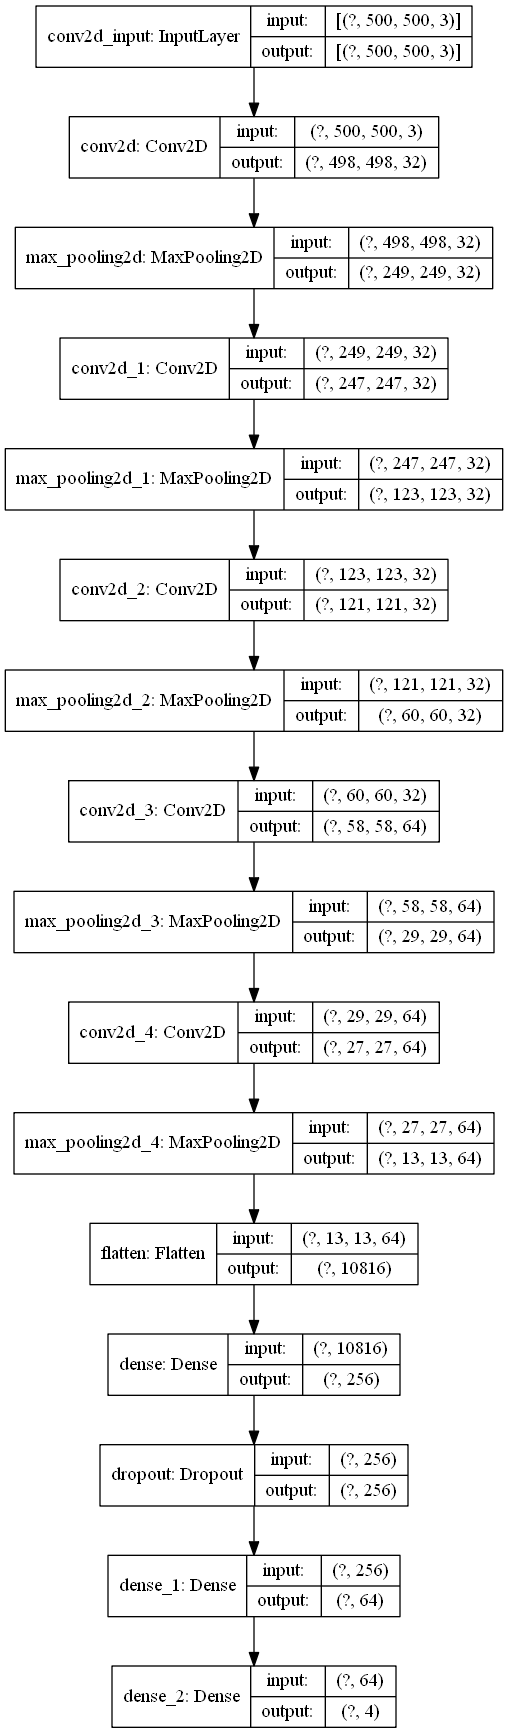

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(cnn,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [12]:
import keras
filepath ="C:/Users/kates/Documents/Classification/output/weights/"+"weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"

In [13]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [14]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
callbacks_list = [ checkpoint,early, learning_rate_reduction]

In [42]:
model_fit = cnn.fit(train,
                      epochs=15,
                      validation_data=test,
                      callbacks=callbacks_list
                     )

Epoch 1/15
375/375 [==============================] - ETA: 0s - loss: 1.0337 - accuracy: 0.5320
Epoch 00001: val_accuracy improved from -inf to 0.57000, saving model to C:/Users/kates/Documents/Classification/output/weights\weights-improvement-01-0.57.hdf5
375/375 [==============================] - 1124s 3s/step - loss: 1.0337 - accuracy: 0.5320 - val_loss: 1.0307 - val_accuracy: 0.5700
Epoch 2/15
375/375 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.7338
Epoch 00002: val_accuracy improved from 0.57000 to 0.62000, saving model to C:/Users/kates/Documents/Classification/output/weights\weights-improvement-02-0.62.hdf5
375/375 [==============================] - 1329s 4s/step - loss: 0.6783 - accuracy: 0.7338 - val_loss: 0.8563 - val_accuracy: 0.6200
Epoch 3/15
375/375 [==============================] - ETA: 0s - loss: 0.5789 - accuracy: 0.7713
Epoch 00003: val_accuracy improved from 0.62000 to 0.62667, saving model to C:/Users/kates/Documents/Classification/outpu

In [70]:
model_path = "C:/Users/kates/Documents/Classification/output/weights/"+"weights-improvement-08-0.74.hdf5"


model = keras.models.load_model(model_path)

# retrain by loading last good model
model_fit = model.fit(train,
                      epochs=15,
                      validation_data=test,
                      callbacks=callbacks_list
                     )

Epoch 1/15
375/375 [==============================] - ETA: 0s - loss: 0.3726 - accuracy: 0.8490
Epoch 00001: val_accuracy improved from -inf to 0.81500, saving model to C:/Users/kates/Documents/Classification/output/weights\weights-improvement-01-0.81.hdf5
375/375 [==============================] - 1358s 4s/step - loss: 0.3726 - accuracy: 0.8490 - val_loss: 0.5403 - val_accuracy: 0.8150
Epoch 2/15
375/375 [==============================] - ETA: 0s - loss: 0.3585 - accuracy: 0.8623
Epoch 00002: val_accuracy improved from 0.81500 to 0.83000, saving model to C:/Users/kates/Documents/Classification/output/weights\weights-improvement-02-0.83.hdf5
375/375 [==============================] - 1213s 3s/step - loss: 0.3585 - accuracy: 0.8623 - val_loss: 0.4790 - val_accuracy: 0.8300
Epoch 3/15
375/375 [==============================] - ETA: 0s - loss: 0.3578 - accuracy: 0.8588
Epoch 00003: val_accuracy did not improve from 0.83000
375/375 [==============================] - 1047s 3s/step - loss: 0

In [17]:
model_path = "C:/Users/kates/Documents/Classification/output/weights/"+"weights-improvement-09-0.85.hdf5"


model = keras.models.load_model(model_path)

# retrain by loading last good model
model_fit = model.fit(train,
                      epochs=25,
                      validation_data=test,
                      callbacks=callbacks_list
                     )

Epoch 1/25
375/375 [==============================] - ETA: 0s - loss: 0.3070 - accuracy: 0.8812
Epoch 00001: val_accuracy did not improve from 0.81750
375/375 [==============================] - 1065s 3s/step - loss: 0.3070 - accuracy: 0.8812 - val_loss: 0.4779 - val_accuracy: 0.7750
Epoch 2/25
375/375 [==============================] - ETA: 0s - loss: 0.2965 - accuracy: 0.8808
Epoch 00002: val_accuracy did not improve from 0.81750
375/375 [==============================] - 1015s 3s/step - loss: 0.2965 - accuracy: 0.8808 - val_loss: 0.5033 - val_accuracy: 0.7600
Epoch 3/25
375/375 [==============================] - ETA: 0s - loss: 0.2848 - accuracy: 0.8893
Epoch 00003: val_accuracy improved from 0.81750 to 0.83250, saving model to C:/Users/kates/Documents/Classification/output/weights\weights-improvement-03-0.83.hdf5
375/375 [==============================] - 1178s 3s/step - loss: 0.2848 - accuracy: 0.8893 - val_loss: 0.3955 - val_accuracy: 0.8325
Epoch 4/25
375/375 [===================

In [19]:
result = model.evaluate_generator(generator=train, verbose=1)

Instructions for updating:
Please use Model.evaluate, which supports generators.
375/375 [==============================] - 648s 2s/step - loss: 0.2090 - accuracy: 0.9218
